<a href="https://colab.research.google.com/github/PrinceChauhanhub/Machine_Learning/blob/main/Implementation_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the required frameworks.

In [ ]:
import numpy as np                    # used to do heavy calculation
import pandas as pd                   # deal with the data sets (read and manipulation)
import seaborn as sns                 # used for data visualization
import matplotlib.pyplot as plt



Load the datasets manually from drive

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Bootcamp/Linear Regression Implementation/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


the above are the top most 5 dataSet where price is the target column
to get all the items of data set just pass the number of columns as parameter e.g data.head(30)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(545, 13)

above we 545 records and 13 columns

below: information of dataframe that some value is null or not  , count always gives the NON-NULL values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Descriptive Statistics** <br>
std = standard deviation <br>
25% ,50%,75% = Inter quartile range(IQR)


Why Descriptive Statistics?</br>
description help to know that data is in standard normal form or not.

Standard normal form </br>
mean = 0
standar deviation = 1

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In the above dataset we can see that mean!= 0 means dataset is not in standard normal form . so we need to do scaling .<br>
Scaling ->  in scaling we provde a range to complete dataset (for e.g -1 to +1). so now the complete dataset lies in a specific range.

Why normal standard form ?</br>
if we not covert data into the standard normal form then at the time of data modelling (after EDA) we can see that the value in area is much higher as compare to bedroom due to this the model will be more biased towards area (biased towards bigger value). to remove this biasness we need to convert the data into standard normal form.

* its more important in those datasets where the values are very different for each feature(column).

Convert the object type to categorical type

why converting ?</br>
conveting bcs the feature mainroad, guestroom,hotwaterheating and more are object type so need to convert to categorical type.
categorical value means discrete value(yes or no or 0 or 1 or 2).</br>
another reason is categorical data is more memory efficient then object type data.

In [ ]:
data['mainroad'] = data['mainroad'].astype('category')
data['guestroom'] = data['guestroom'].astype('category')
data['basement'] = data['basement'].astype('category')
data['hotwaterheating'] = data['hotwaterheating'].astype('category')
data['airconditioning'] = data['airconditioning'].astype('category')
data['prefarea'] = data['prefarea'].astype('category')
data['furnishingstatus'] = data['furnishingstatus'].astype('category')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


above: Dtype changes from object to category

Our Machine are not able to understand the textual data like yes,no or true, false.
So we need to handel that data by converting it to 0 or 1 (its the ultimate goal).<br>
there are many ways to deal with textual data or categorial data.<br>
one of which are :

*   **One Hot Encoding** -> the work is to convert textual data into numerical value.</br>
Pros - > Efficiently handles categorical data and create specific columns for all categories.
Cons - > Increase number of columns (cusre of dimentionality )

below: Dummy Column

The get_dummies() converts the categorical variables into dummy/ indicator variable.

In [ ]:
dataframe = pd.get_dummies(data)
dataframe.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
5,10850000,7500,3,3,1,2,False,True,True,False,...,True,True,False,False,True,False,True,False,True,False
6,10150000,8580,4,3,4,2,False,True,True,False,...,False,True,False,False,True,False,True,False,True,False
7,10150000,16200,5,3,2,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
8,9870000,8100,4,1,2,2,False,True,False,True,...,True,True,False,False,True,False,True,True,False,False
9,9800000,5750,3,2,4,1,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True


Drop_first = True : it reduces the number of features in the dataset.</br>
it reduces the curse of dimensionality menas decrease the number of columns.</br>
It removes the dummy variable trap.</br>
It drops the column..

Curse of dimensionality -> if dataset contains too many features then it will negatively impact the model

In [ ]:
dataframe = pd.get_dummies(data,drop_first=True)
dataframe.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
5,10850000,7500,3,3,1,2,True,False,True,False,True,True,True,False
6,10150000,8580,4,3,4,2,True,False,False,False,True,True,True,False
7,10150000,16200,5,3,2,0,True,False,False,False,False,False,False,True
8,9870000,8100,4,1,2,2,True,True,True,False,True,True,False,False
9,9800000,5750,3,2,4,1,True,True,False,False,True,True,False,True


It is a part of feature selection technique.</br>
Checking Correlation Coefficient : it shows relation between two features.</br>
let f1 nad f2 the features

*   if f1 increase & f2 increasing  -> +ve correlation
*   if f1 increase & f2 decrease -> -ve correlation
*   if 0 -> not correlated

if two features are highly correlated then we remove any one of them bcs both gives the same value




In [ ]:
## Corelation coefficient b/w any two features
dataframe.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


BELOW: this will show the corelation coefficient by using the heat map

if correlation coefficent between two feature are very high then we remove any one of feature.

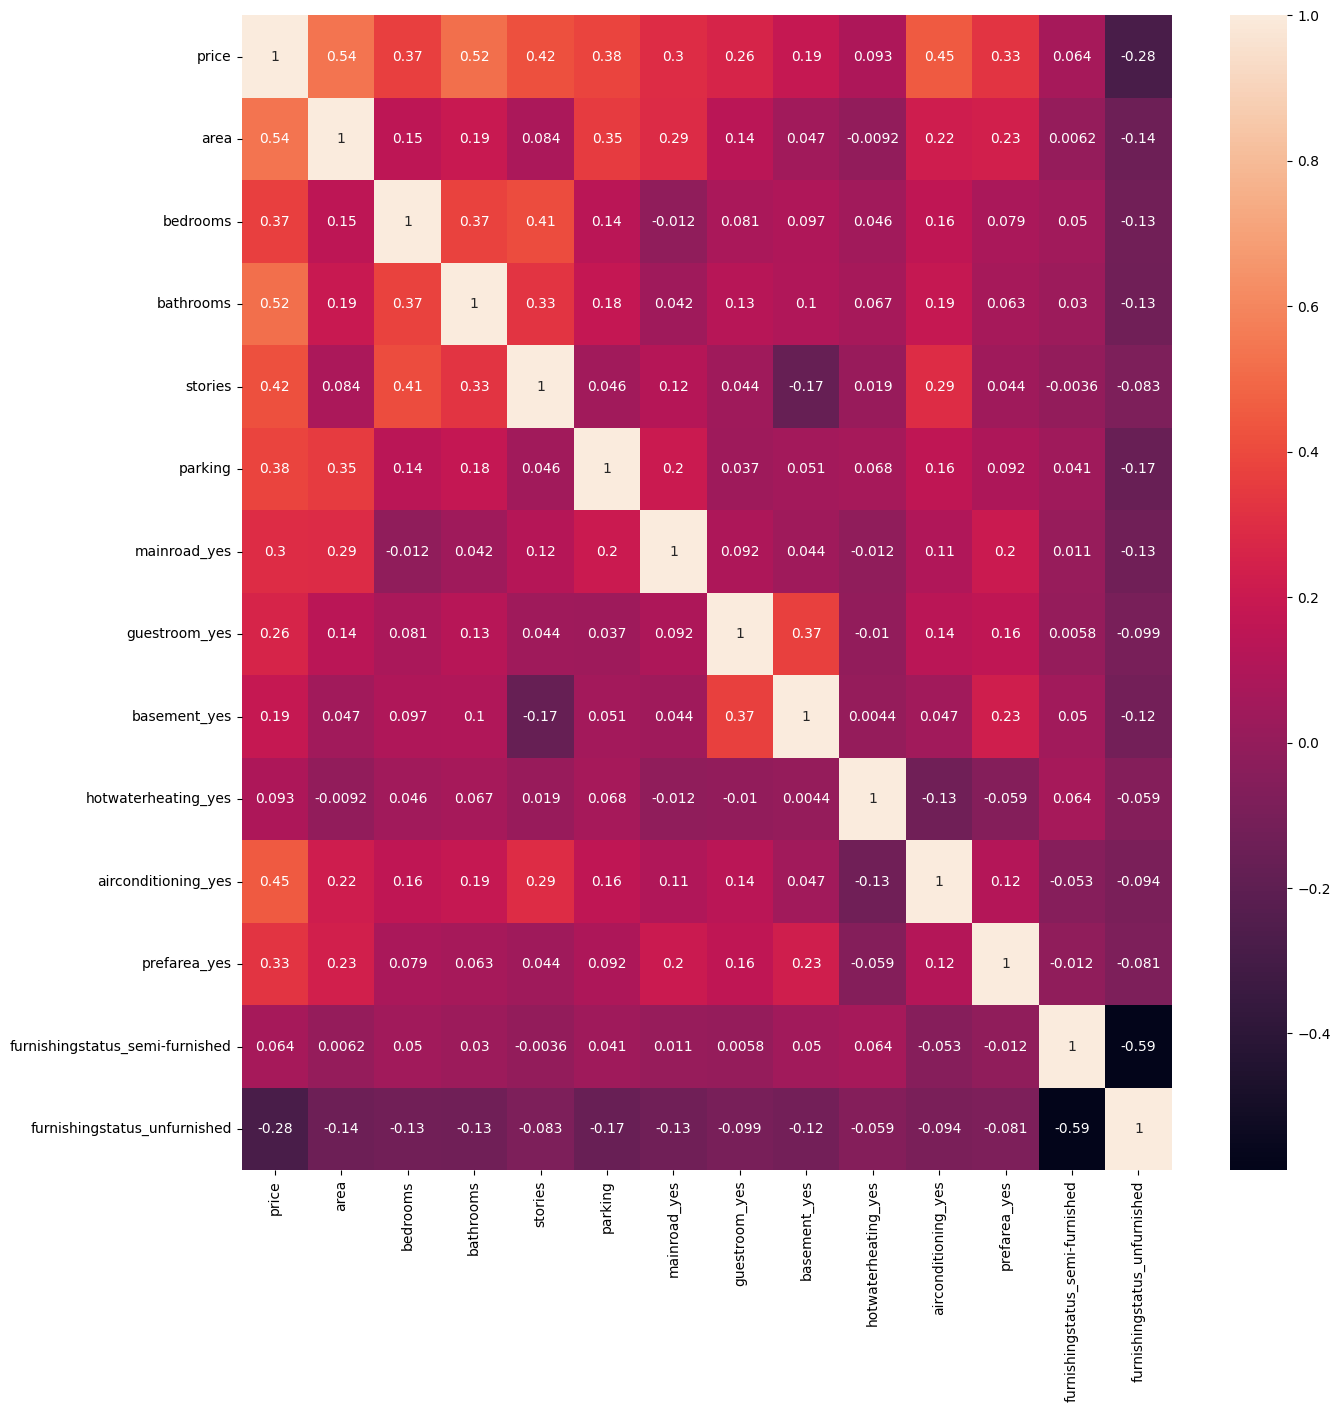

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

Generationg Box plot <br>
box plot : it is used to detect the outliers

No outlier present

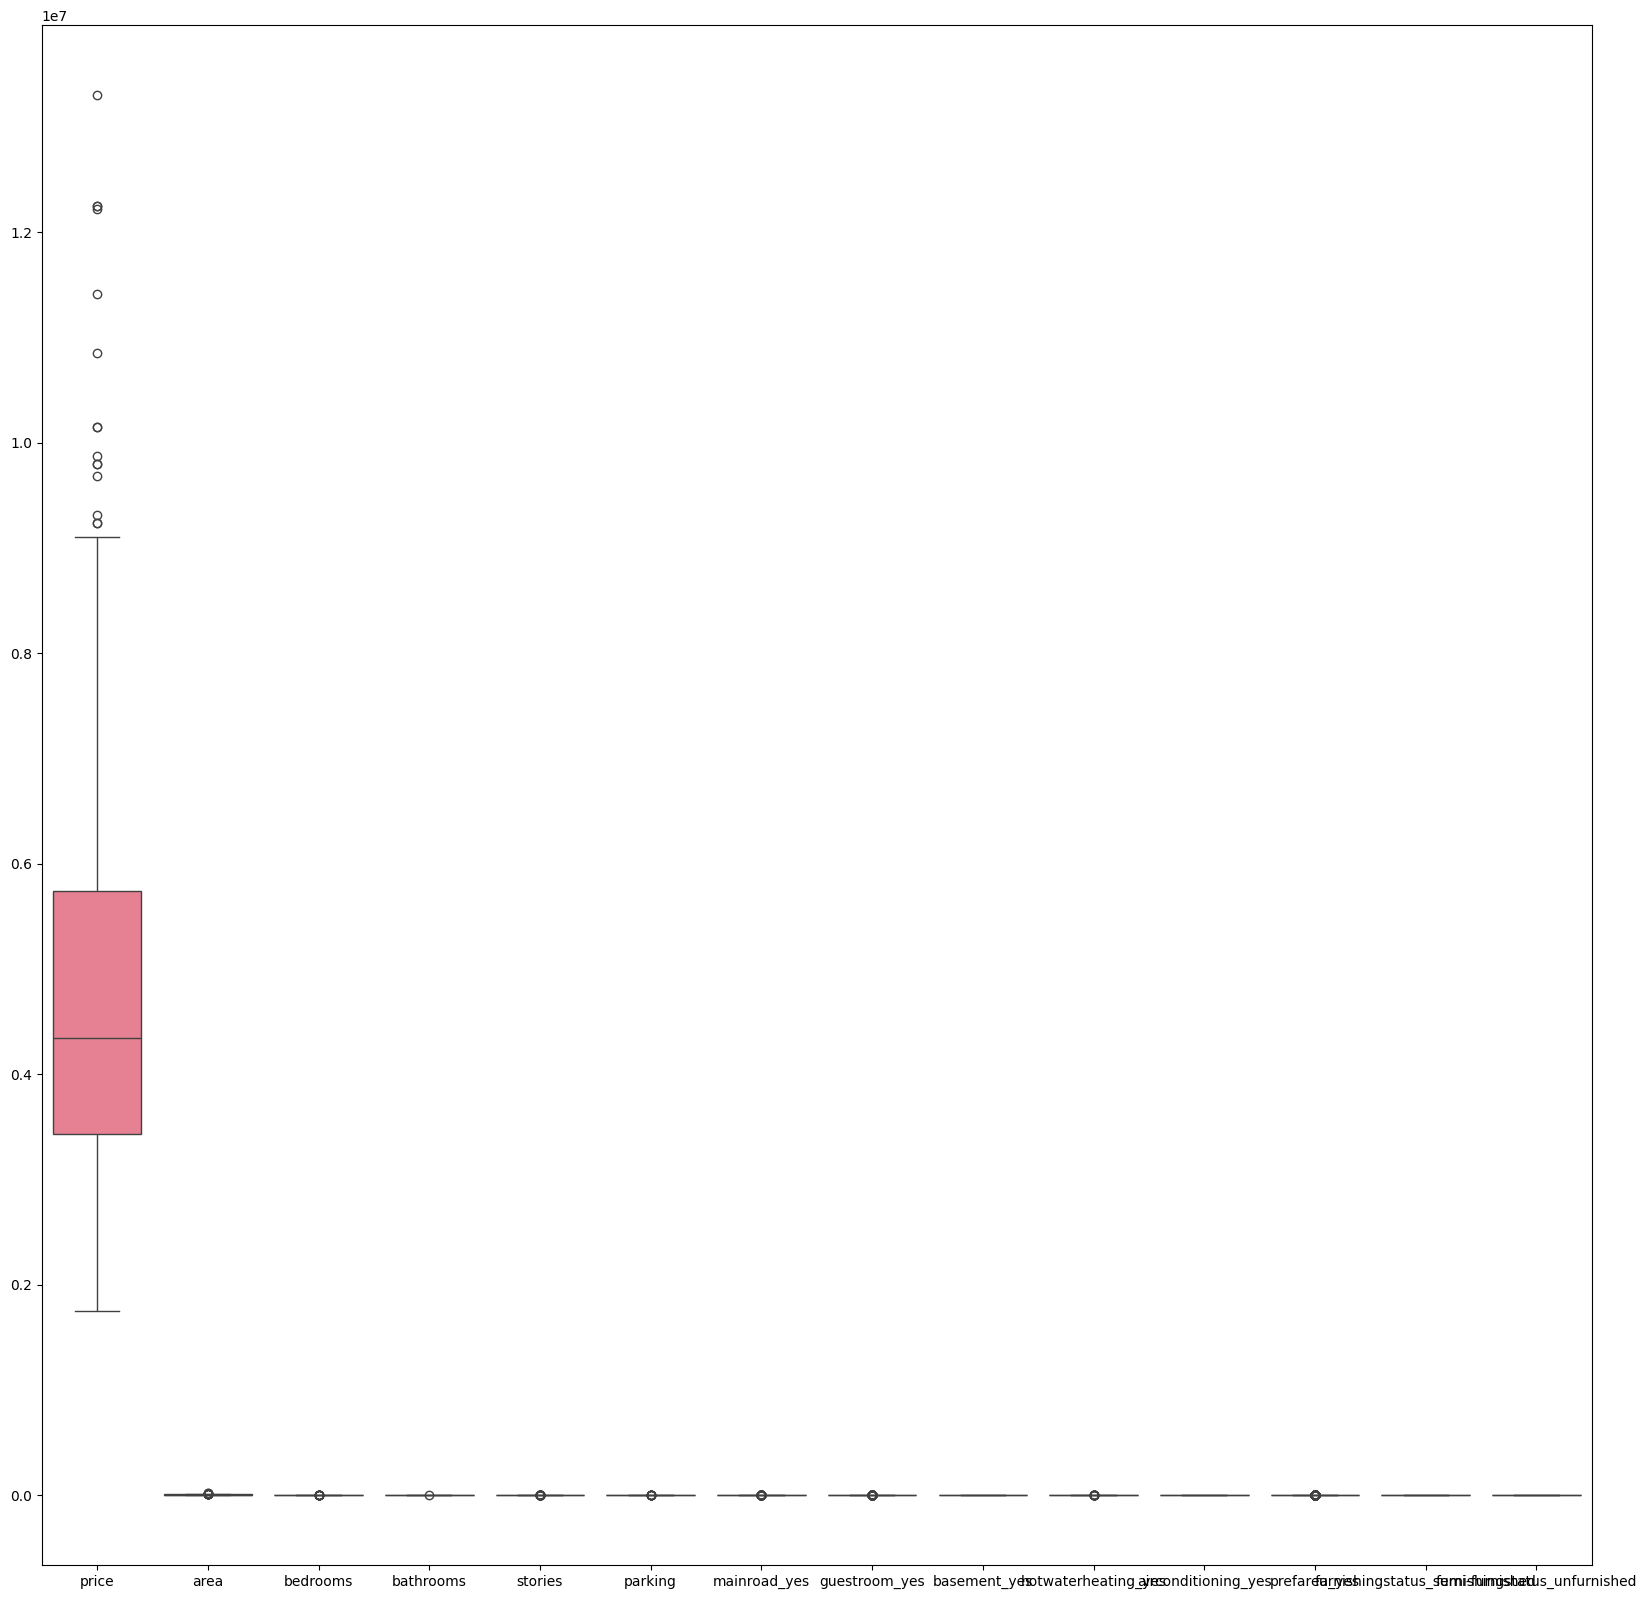

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data = dataframe)
plt.show()

Scaling of numerical features available in dataset

In [ ]:
dataframe.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

below: Doing Scaling of numeric features available in data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(dataframe[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

As we can se, now the data inside area,  bedroom, bathroom, stories, parking lies between a specific range</br>
Now the data is in standard normal form.</br>
the fir_transform() function uses Z-score formula to convet the data .</br>
Z (z-score) = (xi - mean) /standard deviation

In [ ]:
dataframe.head(30)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False
5,10850000,1.083624,0.047278,3.413810,-0.929397,1.517692,True,False,True,False,True,True,True,False
6,10150000,1.581745,1.403419,3.413810,2.532024,1.517692,True,False,False,False,True,True,True,False
7,10150000,5.096263,2.759560,3.413810,0.224410,-0.805741,True,False,False,False,False,False,False,True
8,9870000,1.360358,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,True,False,False
9,9800000,0.276484,0.047278,1.421812,2.532024,0.355976,True,True,False,False,True,True,False,True


**Model Preperation** : Train Test Split

*   Train - 80%
*   Test - 20%
random state = when we do a split it split randomly but if we use random state every time the split data sample is same.


Below: train_test_split : helps to split the data

In [ ]:
from sklearn.model_selection import train_test_split

## Split the dataframe into input and target variable

x=dataframe.drop(['price'],axis=1)      #input feature,axit=1 to make column wise drop
y=dataframe['price']                    #Target Variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)              #test_size = 0.2 take 20% of data to testing part
                                                                                                 #random_state = it will split same data if two persons working on same model

**Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Predtictions**

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([4101489.26342856, 4239148.10322114, 5561206.5574739 ,
       3916949.9174789 , 6982227.47967786, 2716123.60867823,
       5708390.73598415, 3194558.5066096 , 4279830.79114619,
       6699131.12766905, 2433705.84135668, 4064882.51867112,
       2975567.20450659, 2578492.95881584, 3134364.07673909,
       5201024.22022999, 2905450.54625914, 4817592.95758354,
       6393062.73192001, 4356712.71865986, 3823538.35682534,
       5522549.77155971, 3318345.03934796, 5865367.22115118,
       2821974.57896012, 5741357.55677583, 6006820.06395417,
       2587515.14877588, 5836179.75986404, 4131069.3845164 ,
       2857165.40754813, 4190207.19036564, 4679620.54604448,
       2734389.64581229, 6698213.72474788, 3760464.11651108,
       2092537.33204854, 3913492.86931399, 3198557.964116  ,
       4848170.56591051, 7194092.90362519, 4695948.81046225,
       3579937.3656375 , 4359484.1577775 , 4093389.42374907,
       6439479.70960998, 6064076.80233967, 3883578.58928368,
       7234373.89947873,

**Model Evaluation**
there are many way to do model evaluation

*   Mean Square error
*   root mean square error
*   R^2
*   Adjusted R^2





checking Mean Square error

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

704787672561.8761


below:  here we get the all values of m1,m2,m3............,m13

In [ ]:
model.coef_

array([ 549460.06884477,   89569.04135792,  516656.34261514,
        366239.55413846,  249359.19646077,  458254.08916059,
        268823.97576603,  367278.25296967,  976577.59321261,
        923067.78042273,  635435.17185378,    6290.56845747,
       -386937.30344205])

below: the value of c or intercept

In [ ]:
model.intercept_

3853244.828182186

Root mean square is better than mean square error

It gives the root of the mean square value

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

839516.3325164532


**--------------------------------------------> LECTURE 5 <---------------------------------------------**

R^2 Score = 1- RSS(Rsidual sum of square)/TSS(Total sum of Square)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(r2_score(y_test,y_pred))

0.6595139070998459


Adjusted R^2

In [ ]:
adjusted_r2 = 1 - (1-score)*(len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
print(adjusted_r2)

0.6129210733345616


**by default, the OLS model is working in regression problem**

if we increase the number of features the difference betweenn the r^2 and adjusted R^2 incereasing.

In [ ]:
import statsmodels.formula.api as smf
model_smf = smf.ols(formula='price~area+bedrooms+bathrooms+parking+prefarea_yes + hotwaterheating_yes',data=dataframe).fit()
model_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     110.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.14e-90
Time:                        14:00:32   Log-Likelihood:                -8424.3
No. Observations:                 545   AIC:                         1.686e+04
Df Residuals:                     538   BIC:                         1.689e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4.527e+06   6.36e+04     71.224      0.000     4.4e+06    4.65e+06
prefarea_yes[T.True]         9.049e+05   1.31e+05      6.900      0.000    6.47e+05    1.16e+06
hotwaterheating_yes[T.True]  6.033e+05   2.59e+05      2.326      0.020    9.38e+04    1.11e+06
area                         6.409e+05   5.97e+04     10.742      0.000    5.24e+05    7.58e+05
bedrooms                     2.639e+05   5.85e+04      4.514      0.000    1.49e+05    3.79e+05
bathrooms                    6.591e+05   5.91e+04     11.155      0.000    5.43e+05    7.75e+05
parking                      2.946e+05   5.82e+04      5.061      0.000     1.8e+05    4.09e+05
==============================================================================
Omnibus:                       58.283   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.704
Skew:                           0.672   Prob(JB):                     4.99e-23
Kurtosis:                       4.648   Cond. No.                         6.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values hepls to check that which feature is significant.</br>
if the p value is not 0.0000(it means 100 out of 100 used for prediction and no fails) which means that feature is irrelevant.

example - suppose p value of any feature is 0.18000 .then it means out of 100 experiments 100 - 18 = 82 times it fails

In [ ]:
print(model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     110.8
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.14e-90
Time:                        14:00:32   Log-Likelihood:                -8424.3
No. Observations:                 545   AIC:                         1.686e+04
Df Residuals:                     538   BIC:                         1.689e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Store the model coefficents in pickle file for furthur use

In [ ]:
import pickle
pickle.dump(model,open('model.pkl',"wb"))    #wb = write binary

Load the Model and make predictions

In [ ]:
model_pickle = pickle.load(open('model.pkl','rb'))
model_pickle.predict(x_test)

array([4101489.26342856, 4239148.10322114, 5561206.5574739 ,
       3916949.9174789 , 6982227.47967786, 2716123.60867823,
       5708390.73598415, 3194558.5066096 , 4279830.79114619,
       6699131.12766905, 2433705.84135668, 4064882.51867112,
       2975567.20450659, 2578492.95881584, 3134364.07673909,
       5201024.22022999, 2905450.54625914, 4817592.95758354,
       6393062.73192001, 4356712.71865986, 3823538.35682534,
       5522549.77155971, 3318345.03934796, 5865367.22115118,
       2821974.57896012, 5741357.55677583, 6006820.06395417,
       2587515.14877588, 5836179.75986404, 4131069.3845164 ,
       2857165.40754813, 4190207.19036564, 4679620.54604448,
       2734389.64581229, 6698213.72474788, 3760464.11651108,
       2092537.33204854, 3913492.86931399, 3198557.964116  ,
       4848170.56591051, 7194092.90362519, 4695948.81046225,
       3579937.3656375 , 4359484.1577775 , 4093389.42374907,
       6439479.70960998, 6064076.80233967, 3883578.58928368,
       7234373.89947873,

----------------------------------------------> Session - 6 <----------------------------------------------------

Regularization techniques -> LASSO, RIDGE , ELASTIC NET

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
lasso_regression = Lasso()
lasso_regression.fit(x_train, y_train)

ridge_regression = Ridge()
ridge_regression.fit(x_train, y_train)

elasticnet_regression = ElasticNet()
elasticnet_regression.fit(x_train, y_train)

ElasticNet()

In [ ]:
lasso_predict = lasso_regression.predict(x_test)
print(lasso_predict)

[4101490.38911594 4239149.59447161 5561199.40234479 3916951.99091762
 6982214.36057451 2716128.48199696 5708390.14418293 3194559.66035494
 4279832.97933234 6699134.93137471 2433711.81746583 4064882.35938746
 2975572.71022722 2578497.4692108  3134369.13681505 5201015.22915827
 2905458.42398744 4817600.22506384 6393052.92058253 4356710.55040937
 3823543.28865774 5522547.77846399 3318351.16749208 5865367.85291228
 2821973.78187898 5741329.13966753 6006816.22783963 2587521.36071238
 5836181.47677616 4131069.75154676 2857173.65960903 4190213.62621029
 4679623.1170826  2734397.36028588 6698205.00732308 3760464.58920304
 2092549.07079638 3913496.4342877  3198562.37404529 4848164.64467135
 7194089.67139062 4695950.13010511 3579939.57810378 4359485.73105368
 4093390.74307347 6439469.3261998  6064051.48391162 3883577.75077797
 7234371.64579824 4889884.71207174 4427903.74795332 4102733.5253383
 3481312.86866716 3567456.69886092 4654044.77940526 3290577.1031777
 5609984.03140394 6208816.88533719 4

In [ ]:
ridge_predict = ridge_regression.predict(x_test)
print(ridge_predict)

[4104750.20185534 4241645.43805713 5548883.54610446 3926482.98633695
 6969790.21795106 2722122.65640847 5710601.67020898 3200058.58624637
 4287640.70373331 6716100.81785068 2443093.22902318 4069898.55393032
 2978542.18487097 2582369.1833466  3131676.35482218 5196977.70405448
 2918415.47682912 4828656.20436829 6378383.39042992 4360191.32886142
 3829790.89971685 5517504.19305883 3330460.66032212 5872738.24086236
 2823384.85368015 5692092.7225528  6006392.99382684 2597003.61035039
 5832204.53055654 4140164.11669809 2867494.8463432  4200199.76084505
 4686306.47287181 2747217.98135605 6697121.59481065 3766671.38203989
 2101699.38739174 3918059.62029066 3204951.15498054 4838742.00885587
 7193544.54378446 4690484.47815491 3585166.56754528 4367936.28420193
 4101629.0690216  6426055.74753942 6014253.3789793  3879368.82273316
 7222803.37090237 4883396.86744239 4420842.82188424 4114425.3840505
 3480612.29883175 3574709.16090003 4647141.47735716 3299051.96258292
 5611537.77171813 6210567.45037043 

In [ ]:
elasticnet_predict = elasticnet_regression.predict(x_test)
print(elasticnet_predict)

[4329679.34445512 4468355.82323482 4867066.05608752 4344124.29924477
 5988933.40456068 3293715.21054108 5547434.59745753 3628613.45588477
 4586772.39875995 6923219.77929914 2956870.42398415 4225502.80228262
 3299510.71265839 3105827.83885234 3462630.14749409 4789811.62328981
 3647137.27625938 5200604.05303612 5449514.11674815 4516465.04184567
 4269751.96400166 5120475.28817602 3850549.9008734  5716983.52795404
 3215331.8258883  4796841.06648534 5650041.15994907 3325744.98070257
 5535233.87100713 4421433.61465087 3652584.76189913 4616051.34395299
 4906050.34765945 3499992.24179728 6169452.59108661 3925040.2956671
 2822304.21719718 4087271.25282576 3771922.99577353 4579144.028099
 6612718.09251439 4446314.25945385 3852009.55908978 4763392.79664821
 4534500.52081827 5637318.36932532 5148744.1805178  3723868.42114354
 6294183.46079945 4461381.23995638 4313695.38269886 4573430.27322655
 3638869.74475758 4134123.20833615 4284866.89823549 3920571.69160571
 5354682.74393935 5893298.66312429 40

In [ ]:
print("RMSE OF LASSO", np.sqrt(mean_squared_error(y_test, lasso_predict)))

RMSE OF LASSO 839514.8837006752


In [ ]:
print("RMSE OF RIDGE", np.sqrt(mean_squared_error(y_test, ridge_predict)))

RMSE OF RIDGE 837316.038837753


In [ ]:
print("RMSE OF ELASTICNET", np.sqrt(mean_squared_error(y_test, elasticnet_predict)))


RMSE OF ELASTICNET 862050.1833135388


In [ ]:
print("RMSE for linear regression", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE for linear regression 839516.3325164532


In [ ]:
print("r2 score of LASSO regression",r2_score(y_test,lasso_predict))
print("r2 score of RIDGE regression",r2_score(y_test,ridge_predict))
print("r2 score of ELASTICNET regression",r2_score(y_test,elasticnet_predict))
print("r2 score of Linear regression",r2_score(y_test,y_pred))


r2 score of LASSO regression 0.6595150823031835
r2 score of RIDGE regression 0.661296332569136
r2 score of ELASTICNET regression 0.6409903058370403
r2 score of Linear regression 0.6595139070998459
